# Introduction

In this file I am reading in a FITS image of Perseus and I want to plot it in RA and Dec coordinates in hopefully a more efficient way than the other file

## Importing necessary packages

In [1]:
import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style

## Plotting preferences

In [2]:
# Font sizes
title_fs = 25
axis_label_fs = 20
axis_num_fs = 20
legend_fs = 20
cbar_fs = 20
text_fs = 28

# Read in the file and extract the header 

In [3]:
file = 'perseus+WholeMap_herschelONLY+updatedCCs_beta2_mu2_8_columnDensityMap+grid.fits'

In [4]:
hdu_list = fits.open(file, memmap=True)

In [5]:
header = hdu_list[0].header

In [6]:
data = hdu_list[0].data  # Image data to plot

## Using astropy

In [7]:
wcs = WCS(header)

/opt/anaconda3/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


NameError: name 'xmin_deg' is not defined

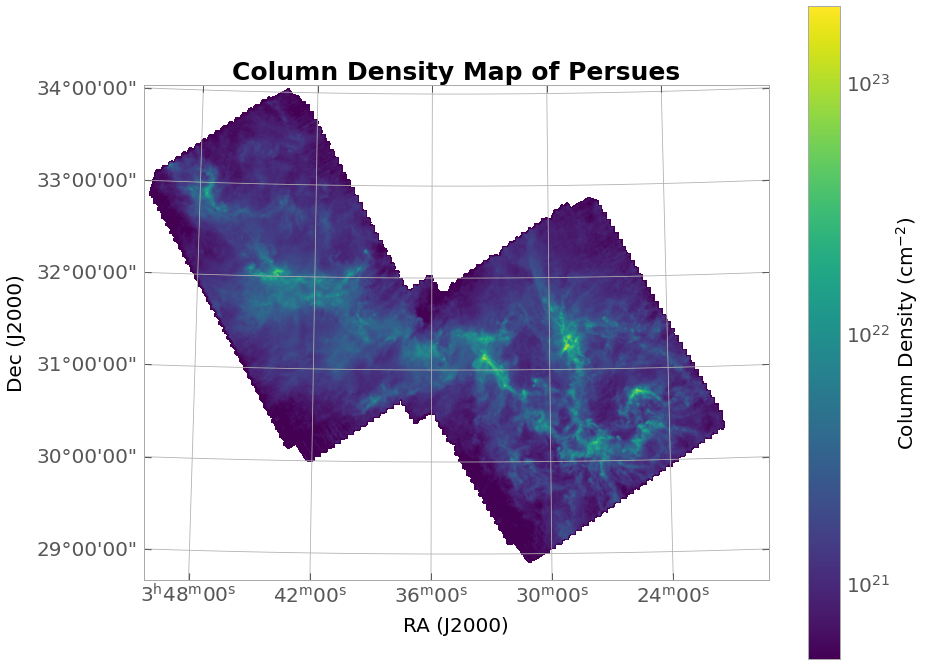

In [11]:
# Define plot size
# ------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': wcs})
# ------------------------------------------------------------------------------------

# Overlay data with a logarithmic color scale using viridis colormap
# vmin and vmax control the color range for log-normalization
# ------------------------------------------------------------------------------------
im = ax.imshow(data, 
               cmap='viridis', 
               vmin=0.5e21, vmax=2.0e23, 
               norm=LogNorm())
# ------------------------------------------------------------------------------------


# Add colorbar for the 'viridis' colormap, associated with imshow on 'ax'
cbar = plt.colorbar(im, ax=ax)

# Add title, axis and color bar labels 
# ------------------------------------------------------------------------------------
ax.set_title('Column Density Map of Persues', fontsize=title_fs, fontweight='bold')
ax.set_xlabel('RA (J2000)', fontsize=axis_label_fs)
ax.set_ylabel('Dec (J2000)', fontsize=axis_label_fs)
cbar.set_label(r'Column Density (cm$^{-2}$)', fontsize=cbar_fs)
# ------------------------------------------------------------------------------------


# Format RA and Dec axes in hh:mm:ss and dd:mm:ss
ax.coords[0].set_major_formatter('hh:mm:ss')  # RA
ax.coords[1].set_major_formatter('dd:mm:ss')  # Dec

# Adjust ticks and numbers for plot and color bar
# ----------------------------------------------------------------------------------------
ax.tick_params(labelsize=axis_num_fs, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Adjust axis labels and ticks for the colorbar
cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7)
cbar.ax.tick_params(which='minor', length=4)
# ------------------------------------------------------------------------------------




# Create and add the circular beam to the plot
# ----------------------------------------------------------------------------------------
beam_circle = Circle(
    (xmin_deg + 1, ymin_deg + 0.5),            # Center of the circle
    radius= beam_radius_deg*30,  # Radius
    edgecolor='black',  # Edge color
    facecolor='blue',   # Fill color
    alpha=1,            # Transparency
    #hatch='/',          # Diagonal hatch pattern
    label = 'Beam Size (x30)'
)

# Add the beam to the plot
ax.add_patch(beam_circle)
# ------------------------------------------------------------------------------------




# Add the "Perseus" label in the top left corner
# ------------------------------------------------------------------------------------
ax.text(xmin_deg + 1.75, ymax_deg - 0.1, 
        'Perseus', 
        fontsize=text_fs, 
        ha='left', 
        va='top')
# ------------------------------------------------------------------------------------




# Add line and text for X AU
# ------------------------------------------------------------------------------------------
x_start_deg = xmax_deg - 1
y_pos_deg = ymin_deg + 0.5

ax.plot([x_start_deg, x_start_deg + length_deg], 
        [y_pos_deg, y_pos_deg], 
        color='black', 
        linewidth=3)

ax.text(x_start_deg + length_deg / 2, y_pos_deg - 0.1 , 
        f'{length_AU} AU', 
        fontsize=text_fs, 
        ha='center', 
        va='top')
# ------------------------------------------------------------------------------------


# Flip the axes if needed
# ------------------------------------------------------------------------------------------
# ax.invert_xaxis()
ax.invert_yaxis()
# ------------------------------------------------------------------------------------------






# Add legend
# ------------------------------------------------------------------------------------------
ax.legend(loc='upper center', 
          bbox_to_anchor=(0.5, -0.1), 
          fontsize=text_fs, 
          ncol=1)  
# ------------------------------------------------------------------------------------------






# Tight layout for better spacing
plt.tight_layout()
plt.show()